# Tensorflow NN Model

In this jupyter notebook, a Neural network is designed to predict some values from dataset.
<br>
Let's learn about the dataset:<br>
The dataset comprises of data of some interactions of clients with an agency and to which we are supposed to predict if the client actually purchase the product or not.<br>
The interactions are in form of Number of call, emails, webpage visits, etc. <br>
<br>
First job at hand would be to clean this dataset, because its going to main irrelevant data, NaN values, and string values as well.<br>
So we'll be converting and categorizing this data as well to make it usable to our training.

#### Let's start

## Importing Libraries

In [1]:
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

import pandas as pd
import numpy as np

import sklearn
from sklearn.model_selection import train_test_split

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [10]:
sns.set_style('whitegrid')

## Importing dataset(s)

In [2]:
df = pd.read_excel('../Datasets/Customers2.xlsx')

In [3]:
df.head()

,CustomerID,NumCalls,NumEmails,NumDownloads,NumEvents,NumForms,Language,Country,WebVisits,PageVisits,PriorClient,MadeAPurchase
0,1,33,19,1,0,1,German,Germany,10.0,0.0,Yes,No
1,2,0,1,0,1,0,English,USA,61.0,0.0,No,No
2,3,4,6,2,0,0,Spanish,Mexico,1.0,0.0,No,No
3,4,0,10,0,0,1,English,India,26.0,0.0,No,No
4,5,7,0,0,0,0,English,USA,11.0,0.0,No,Yes


In [193]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 753 entries, 0 to 752
Data columns (total 12 columns):
CustomerID       753 non-null int64
NumCalls         753 non-null int64
NumEmails        753 non-null int64
NumDownloads     753 non-null int64
NumEvents        753 non-null int64
NumForms         753 non-null int64
Language         753 non-null object
Country          753 non-null object
WebVisits        739 non-null float64
PageVisits       739 non-null float64
PriorClient      753 non-null object
MadeAPurchase    753 non-null object
dtypes: float64(2), int64(6), object(4)
memory usage: 70.7+ KB


### Checking for null values

Because it comes to mind first

In [40]:
df.isnull()

,CustomerID,NumCalls,NumEmails,NumDownloads,NumEvents,NumForms,Language,Country,WebVisits,PageVisits,PriorClient,MadeAPurchase
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,False,False


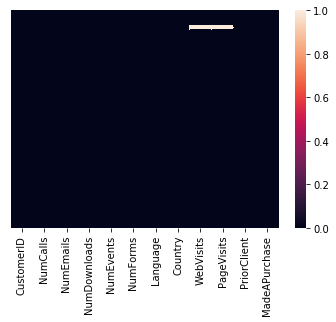

In [4]:
sns.heatmap(df.isnull(), yticklabels=False,)

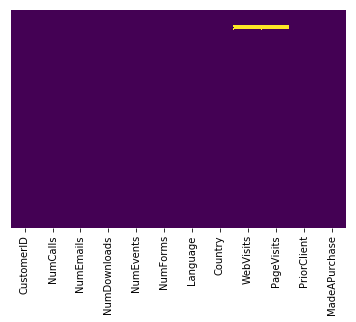

In [5]:
sns.heatmap(df.isnull(),yticklabels=False,cbar =False,cmap='viridis')

## Visualizations

Cause Data is Beautiful

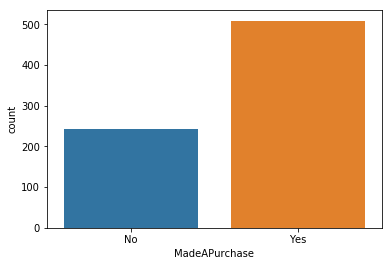

In [7]:
sns.countplot('MadeAPurchase', data=df)

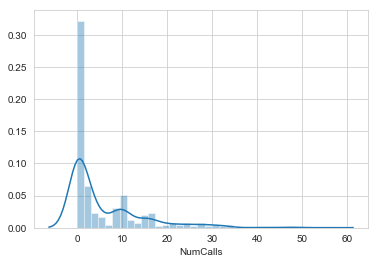

In [16]:
sns.distplot(df['NumCalls'], bins=35)

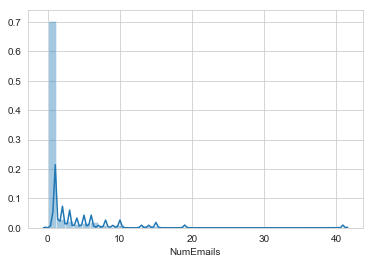

In [17]:
sns.distplot(df['NumEmails'], bins=35)

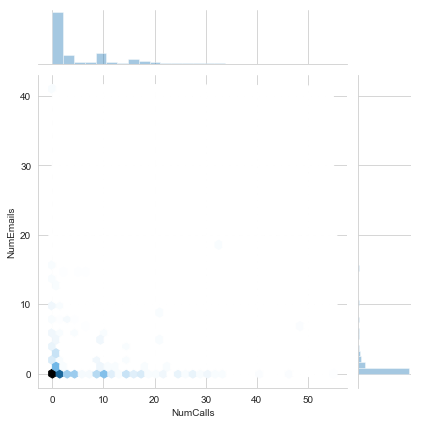

In [25]:
sns.jointplot(x = 'NumCalls', y = 'NumEmails', data = df,kind = 'hex')

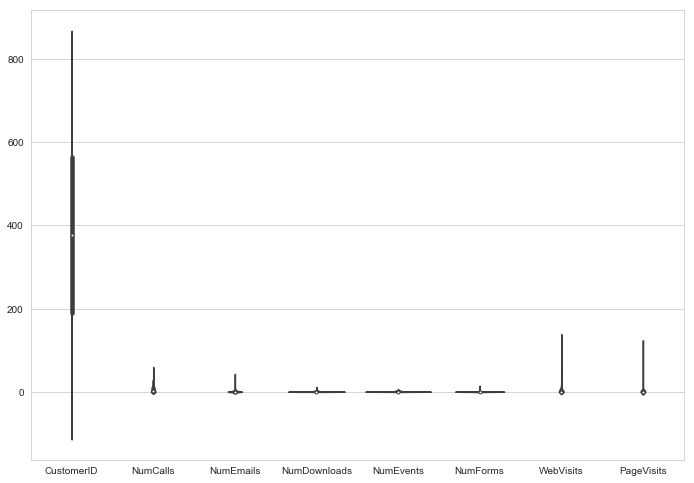

In [28]:
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.violinplot(ax=ax, data=df)

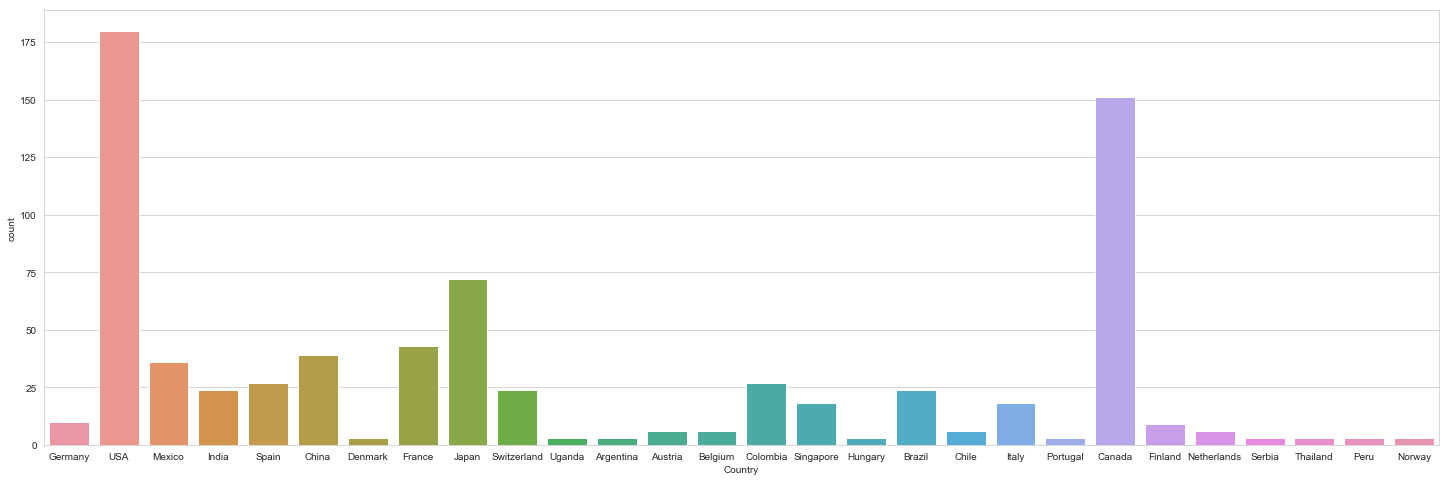

In [39]:
dims = (25, 8)
fig, ax = plt.subplots(figsize=dims)
sns.countplot('Country',ax=ax, data=df)

C:\Users\uV\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\uV\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


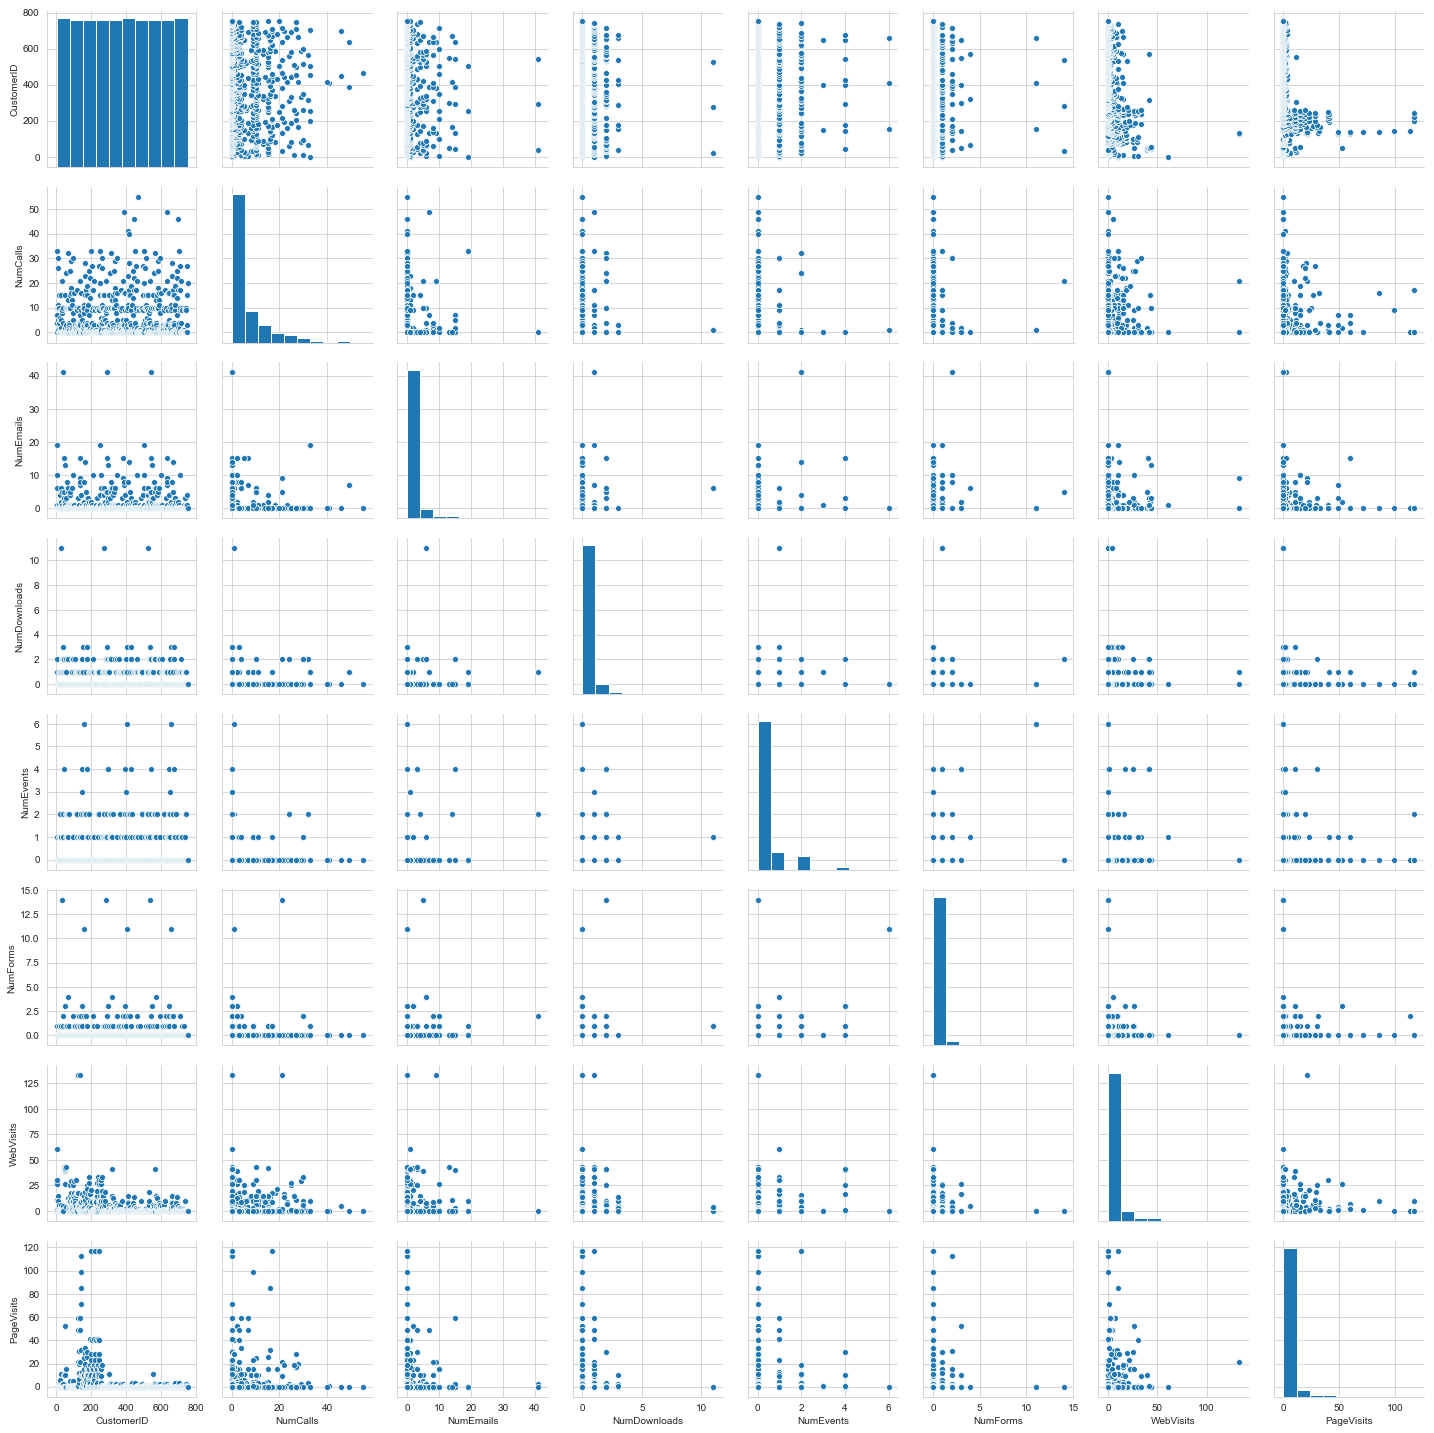

In [41]:
sns.pairplot(df,palette ='Blues')

## Refining the data

In [43]:
df.head()

,CustomerID,NumCalls,NumEmails,NumDownloads,NumEvents,NumForms,Language,Country,WebVisits,PageVisits,PriorClient,MadeAPurchase
0,1,33,19,1,0,1,German,Germany,10.0,0.0,Yes,No
1,2,0,1,0,1,0,English,USA,61.0,0.0,No,No
2,3,4,6,2,0,0,Spanish,Mexico,1.0,0.0,No,No
3,4,0,10,0,0,1,English,India,26.0,0.0,No,No
4,5,7,0,0,0,0,English,USA,11.0,0.0,No,Yes


In [44]:
dd = df.copy()

In [45]:
dd.head()

,CustomerID,NumCalls,NumEmails,NumDownloads,NumEvents,NumForms,Language,Country,WebVisits,PageVisits,PriorClient,MadeAPurchase
0,1,33,19,1,0,1,German,Germany,10.0,0.0,Yes,No
1,2,0,1,0,1,0,English,USA,61.0,0.0,No,No
2,3,4,6,2,0,0,Spanish,Mexico,1.0,0.0,No,No
3,4,0,10,0,0,1,English,India,26.0,0.0,No,No
4,5,7,0,0,0,0,English,USA,11.0,0.0,No,Yes


In [46]:
dd = dd.drop(['CustomerID'], axis=1)

In [48]:
dd.head()

,NumCalls,NumEmails,NumDownloads,NumEvents,NumForms,Language,Country,WebVisits,PageVisits,PriorClient,MadeAPurchase
0,33,19,1,0,1,German,Germany,10.0,0.0,Yes,No
1,0,1,0,1,0,English,USA,61.0,0.0,No,No
2,4,6,2,0,0,Spanish,Mexico,1.0,0.0,No,No
3,0,10,0,0,1,English,India,26.0,0.0,No,No
4,7,0,0,0,0,English,USA,11.0,0.0,No,Yes


In [51]:
# deleting the null values

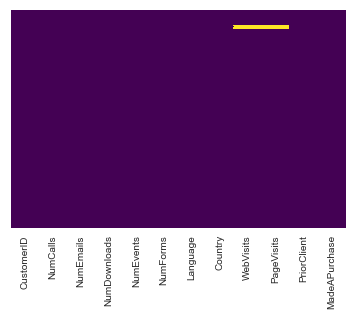

In [57]:
sns.heatmap(df.isnull(),yticklabels=False,cbar =False,cmap='viridis')

In [54]:
dd = dd[dd['WebVisits'].notna()]

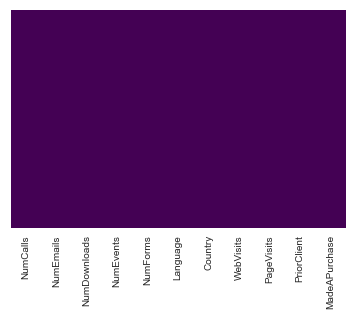

In [58]:
sns.heatmap(dd.isnull(),yticklabels=False,cbar =False,cmap='viridis')

In [49]:
def toInt(double):
    return int(double)

In [60]:
dd['WebVisits'] = dd['WebVisits'].map(toInt)

C:\Users\uV\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [61]:
dd.head()

,NumCalls,NumEmails,NumDownloads,NumEvents,NumForms,Language,Country,WebVisits,PageVisits,PriorClient,MadeAPurchase
0,33,19,1,0,1,German,Germany,10,0.0,Yes,No
1,0,1,0,1,0,English,USA,61,0.0,No,No
2,4,6,2,0,0,Spanish,Mexico,1,0.0,No,No
3,0,10,0,0,1,English,India,26,0.0,No,No
4,7,0,0,0,0,English,USA,11,0.0,No,Yes


In [62]:
dd['PageVisits'] = dd['PageVisits'].map(toInt)

C:\Users\uV\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [63]:
dd.head()

,NumCalls,NumEmails,NumDownloads,NumEvents,NumForms,Language,Country,WebVisits,PageVisits,PriorClient,MadeAPurchase
0,33,19,1,0,1,German,Germany,10,0,Yes,No
1,0,1,0,1,0,English,USA,61,0,No,No
2,4,6,2,0,0,Spanish,Mexico,1,0,No,No
3,0,10,0,0,1,English,India,26,0,No,No
4,7,0,0,0,0,English,USA,11,0,No,Yes


In [171]:
client = pd.get_dummies(dd['PriorClient'], drop_first=True)
client.columns = ['PriorClients']
client.head()

,PriorClients
0,1
1,0
2,0
3,0
4,0


### Tasks

Our job at hand would be:<br>
1. We will be getting rid any rows with null values, since they are few we can simply just ommit those.<br>
2. We will make some useful and meaningful columns on our own, like<br>
- Selecting countries with higher frequencing and making their own columns.<br>
- Calculating total interactions (i.e. call, visits, mails, etc)<br>

In [73]:
client.head()

,Yes
0,1
1,0
2,0
3,0
4,0


In [75]:
client.head()

,PriorClient
0,1
1,0
2,0
3,0
4,0


Categorizing 'MadeAPurchase'

In [172]:
purchase = pd.get_dummies(dd['MadeAPurchase'], drop_first= True)
purchase.columns = ['Purchase']
purchase.head()

,Purchase
0,0
1,0
2,0
3,0
4,1


Classifying the 5 most frequent values in 'Countries' attribute

In [81]:
freq5 = dd['Country'].value_counts()[:5].index.tolist()
freq5

['USA', 'Canada', 'Japan', 'France', 'China']

In [82]:
# creating new fields

In [87]:
dc = pd.DataFrame(index = columns=freq5)

In [88]:
dc

,USA,Canada,Japan,France,China


In [132]:
dc

,USA,Canada,Japan,France,China


In [142]:
type(dd['Country'].tolist())

list

In [144]:
listOfCountries = dd['Country'].tolist()

In [146]:
catg = freq5+['Other']

In [160]:
def newf(country):
    dl = []
    for j in country:
        data = {}
        for i in freq5:
            if j == i:
                data.update({i: 1})
            else:
                data.update({i: 0})
        if j not in freq5:
            data.update({'Other': 1})
        else:
            data.update({'Other': 0})
        dl.append(data)
    return pd.DataFrame(dl)
    
            

In [161]:
dc = newf(listOfCountries)

In [163]:
dc.head()

,Canada,China,France,Japan,Other,USA
0,0,0,0,0,1,0
1,0,0,0,0,0,1
2,0,0,0,0,1,0
3,0,0,0,0,1,0
4,0,0,0,0,0,1


In [206]:
interactions = pd.DataFrame()

In [207]:
dd.head()

,NumCalls,NumEmails,NumDownloads,NumEvents,NumForms,Language,Country,WebVisits,PageVisits,PriorClient,MadeAPurchase
0,33,19,1,0,1,German,Germany,10,0,Yes,No
1,0,1,0,1,0,English,USA,61,0,No,No
2,4,6,2,0,0,Spanish,Mexico,1,0,No,No
3,0,10,0,0,1,English,India,26,0,No,No
4,7,0,0,0,0,English,USA,11,0,No,Yes


In [210]:
interactions['Interactions'] = dd[['NumCalls', 'NumEmails', 'NumDownloads', 'NumEvents', 'NumForms', 'WebVisits', 'PageVisits']].sum(axis=1)

In [212]:
interactions.head()

,Interactions
0,64
1,63
2,13
3,37
4,18


In [213]:
dataset = pd.concat([dd, dc, interactions, client, purchase,], axis=1)

In [214]:
dataset.drop(['Language', 'Country', 'PriorClient', 'MadeAPurchase'],axis=1, inplace= True)

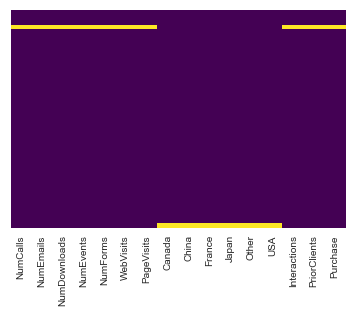

In [215]:
sns.heatmap(dataset.isnull(),yticklabels=False,cbar =False,cmap='viridis')

In [216]:
dataset = dataset.dropna()

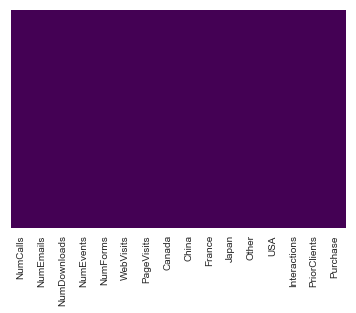

In [217]:
sns.heatmap(dataset.isnull(),yticklabels=False,cbar =False,cmap='viridis')

In [218]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 725 entries, 0 to 738
Data columns (total 16 columns):
NumCalls        725 non-null float64
NumEmails       725 non-null float64
NumDownloads    725 non-null float64
NumEvents       725 non-null float64
NumForms        725 non-null float64
WebVisits       725 non-null float64
PageVisits      725 non-null float64
Canada          725 non-null float64
China           725 non-null float64
France          725 non-null float64
Japan           725 non-null float64
Other           725 non-null float64
USA             725 non-null float64
Interactions    725 non-null float64
PriorClients    725 non-null float64
Purchase        725 non-null float64
dtypes: float64(16)
memory usage: 96.3 KB


In [219]:
dataset = dataset.astype(int)

In [220]:
dataset.head()

,NumCalls,NumEmails,NumDownloads,NumEvents,NumForms,WebVisits,PageVisits,Canada,China,France,Japan,Other,USA,Interactions,PriorClients,Purchase
0,33,19,1,0,1,10,0,0,0,0,0,1,0,64,1,0
1,0,1,0,1,0,61,0,0,0,0,0,0,1,63,0,0
2,4,6,2,0,0,1,0,0,0,0,0,1,0,13,0,0
3,0,10,0,0,1,26,0,0,0,0,0,1,0,37,0,0
4,7,0,0,0,0,11,0,0,0,0,0,0,1,18,0,1


## Some more visualisations

In [221]:
dataset.corr()

,NumCalls,NumEmails,NumDownloads,NumEvents,NumForms,WebVisits,PageVisits,Canada,China,France,Japan,Other,USA,Interactions,PriorClients,Purchase
NumCalls,1.000000,-0.021013,-0.090117,-0.170445,0.025541,0.029713,-0.022968,0.080592,-0.060055,0.090690,-0.110280,-0.021550,0.005423,0.427624,-0.132212,0.150445
NumEmails,-0.021013,1.000000,0.104609,0.154178,0.136407,0.051009,-0.012430,-0.070159,-0.005777,0.062484,-0.012388,0.093633,-0.061761,0.222314,0.080941,0.052240
NumDownloads,-0.090117,0.104609,1.000000,0.259248,0.103581,-0.000328,-0.037833,-0.019080,-0.048359,-0.014740,-0.076217,-0.043527,0.154060,0.020595,0.225882,-0.240956
NumEvents,-0.170445,0.154178,0.259248,1.000000,0.321170,-0.012915,-0.011341,-0.054305,-0.024309,0.005337,-0.041576,0.029613,0.057235,0.014907,0.283615,-0.128705
NumForms,0.025541,0.136407,0.103581,0.321170,1.000000,-0.041791,-0.006333,-0.052376,-0.050171,0.020829,-0.060085,-0.008332,0.115944,0.091954,0.153508,0.073417
WebVisits,0.029713,0.051009,-0.000328,-0.012915,-0.041791,1.000000,0.087978,-0.036191,-0.039725,-0.064180,-0.034142,-0.006001,0.121649,0.614803,-0.014433,-0.093509
PageVisits,-0.022968,-0.012430,-0.037833,-0.011341,-0.006333,0.087978,1.000000,-0.067936,-0.007540,-0.043458,0.003494,-0.047779,0.144337,0.672413,0.012455,-0.033621
Canada,0.080592,-0.070159,-0.019080,-0.054305,-0.052376,-0.036191,-0.067936,1.000000,-0.117947,-0.127710,-0.167580,-0.374630,-0.281488,-0.047461,-0.050836,-0.006636
China,-0.060055,-0.005777,-0.048359,-0.024309,-0.050171,-0.039725,-0.007540,-0.117947,1.000000,-0.058230,-0.076409,-0.170816,-0.128347,-0.060224,0.070074,-0.108023
France,0.090690,0.062484,-0.014740,0.005337,0.020829,-0.064180,-0.043458,-0.127710,-0.058230,1.000000,-0.082734,-0.184954,-0.138970,-0.009643,0.006556,-0.001516


## Some more visuals

Cause we love them

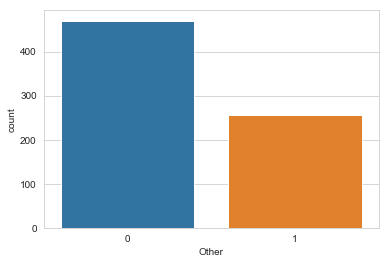

In [222]:
# clients not belonging to the 5 most frequent countries
sns.countplot('Other',data= dataset)

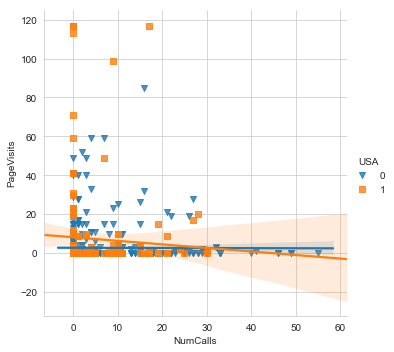

In [223]:
sns.lmplot(x='NumCalls',y='PageVisits',data=dataset,hue='USA',markers=['v','s'],)

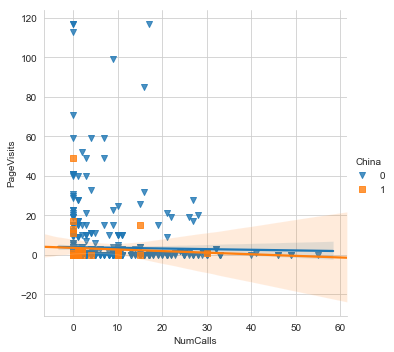

In [224]:
sns.lmplot(x='NumCalls',y='PageVisits',data=dataset,hue='China',markers=['v','s'],)

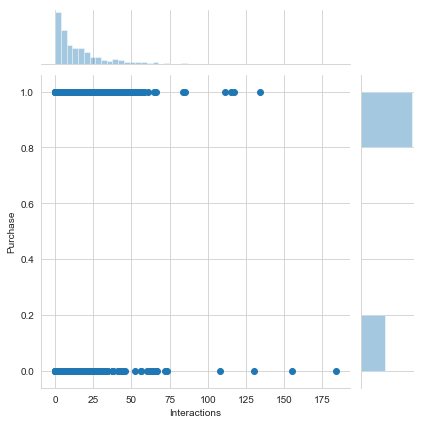

In [226]:
sns.jointplot('Interactions', 'Purchase', data=dataset)

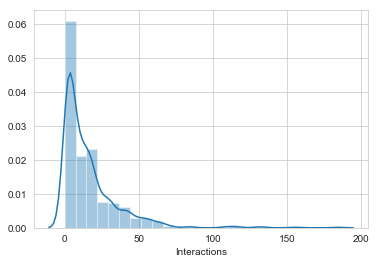

In [229]:
sns.distplot(dataset['Interactions'], bins=25)

# Model Development

### Spliting dataset

In [230]:
df_train = dataset.sample(frac=0.8, random_state=101)
df_test  = dataset.drop(df_train.index)

In [231]:
lab_train = df_train.pop('Purchase')
lab_test = df_test.pop('Purchase')

In [232]:
df_train.head()

,NumCalls,NumEmails,NumDownloads,NumEvents,NumForms,WebVisits,PageVisits,Canada,China,France,Japan,Other,USA,Interactions,PriorClients
656,3,0,0,0,0,0,0,0,0,0,0,1,0,3,0
283,21,5,2,0,14,0,0,0,0,0,0,0,1,42,1
281,0,0,2,0,0,10,0,0,0,0,0,0,1,12,1
365,0,0,1,2,0,1,0,1,0,0,0,0,0,4,1
627,0,0,1,0,0,0,0,0,0,0,0,0,1,1,1


In [233]:
lab_train.head()

656    1
283    1
281    0
365    0
627    0
Name: Purchase, dtype: int32

Normalizing the data

In [236]:
df_stats = dataset.describe()
df_stats = df_stats.drop('Purchase', axis=1)
df_stats = df_stats.transpose() 
df_stats

,count,mean,std,min,25%,50%,75%,max
NumCalls,725.0,5.937931,8.741705,0.0,0.0,1.0,10.0,55.0
NumEmails,725.0,1.284138,3.813951,0.0,0.0,0.0,1.0,41.0
NumDownloads,725.0,0.357241,0.936134,0.0,0.0,0.0,0.0,11.0
NumEvents,725.0,0.331034,0.838105,0.0,0.0,0.0,0.0,6.0
NumForms,725.0,0.268966,1.244075,0.0,0.0,0.0,0.0,14.0
WebVisits,725.0,4.291034,10.699537,0.0,0.0,0.0,4.0,133.0
PageVisits,725.0,3.710345,12.712893,0.0,0.0,0.0,1.0,117.0
Canada,725.0,0.205517,0.404358,0.0,0.0,0.0,0.0,1.0
China,725.0,0.051034,0.220220,0.0,0.0,0.0,0.0,1.0
France,725.0,0.059310,0.236368,0.0,0.0,0.0,0.0,1.0


In [237]:
maxi = df_stats['max']
mini = df_stats['min']

def norm(a):
    return (a - mini)/(maxi-mini)  

In [238]:
norm_df_train = norm(df_train)
norm_df_test = norm(df_test)

## Model Architecture

In [240]:
len(df_train.keys())

15

In [252]:
#model v1
def modelv1():
    model = Sequential([
        Dense(15, kernel_initializer='normal', activation='relu', input_dim=len(df_train.keys())),
        Dense(60, kernel_initializer='normal', activation='relu'),
        Dense(60, kernel_initializer='normal', activation='relu'),
        Dense(30, kernel_initializer='normal', activation='relu'),
        Dense(1)
    ])
    model.compile(loss='mse',
                 optimizer='adam',
                 metrics=['mae', 'mse'])
    return model

## Getting Started with Models

Model 1

In [255]:
model = modelv1()
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_17 (Dense)             (None, 15)                240       
_________________________________________________________________
dense_18 (Dense)             (None, 60)                960       
_________________________________________________________________
dense_19 (Dense)             (None, 60)                3660      
_________________________________________________________________
dense_20 (Dense)             (None, 30)                1830      
_________________________________________________________________
dense_21 (Dense)             (None, 1)                 31        
Total params: 6,721
Trainable params: 6,721
Non-trainable params: 0
_________________________________________________________________


In [256]:
historyv1 = model.fit(norm_df_train, lab_train, epochs=2000, batch_size=3, validation_split=0.1, verbose=0)

In [258]:
hist = pd.DataFrame(historyv1.history)
hist.tail()

,loss,mean_absolute_error,mean_squared_error,val_loss,val_mean_absolute_error,val_mean_squared_error
1995,0.023695,0.063181,0.023695,0.264880,0.305426,0.264880
1996,0.023842,0.063504,0.023842,0.257194,0.300075,0.257194
1997,0.022691,0.058868,0.022691,0.253158,0.293117,0.253158
1998,0.023613,0.059952,0.023613,0.255100,0.291631,0.255100
1999,0.024226,0.065157,0.024226,0.265240,0.299961,0.265240


Voila!

## Evaluation

In [259]:
print('\n# Evaluate on test data')
results = model.evaluate(norm_df_test, lab_test, batch_size=128)
print('test loss:', results)


# Evaluate on test data
145/145 [==============================] - 0s 28us/sample - loss: 0.1806 - mean_absolute_error: 0.2284 - mean_squared_error: 0.1806
test loss: [0.18055240285807642, 0.22844683, 0.18055241]


In [260]:
test_predictions_model = model.predict(norm_df_test).flatten()

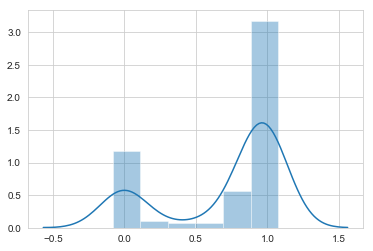

In [261]:
# predictions
sns.distplot(test_predictions_model)

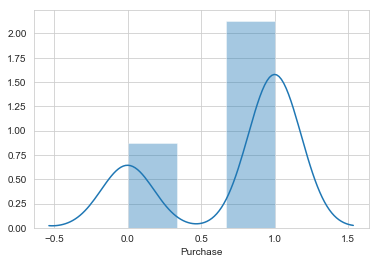

In [269]:
# Actual data
sns.distplot(lab_test)

## Conclusion

#### The losses are very low, and predictions are made very well by our model
#### We are happy with the results